<a href="https://colab.research.google.com/github/catastropiyush/Itzpapalotl/blob/main/Comp_Methods_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Differential Equations  : Day 1**

###**Instructor : ORCAkaKING**

##*ODE Solvers*



$$y(x+h)=y(x)+hy'(x)$$ \
**Explicit Euler**\
$$y_{n+1}=y_{n}+hf'(x_n,y_n)$$ \
**Implicit Euler**
$$y_{n+1}=y_{n}+hf'(x_{n+1},y_{n+1})$$


Differential Equation
$$y'=\lambda y$$
Solution$$y=e^{\lambda x}$$

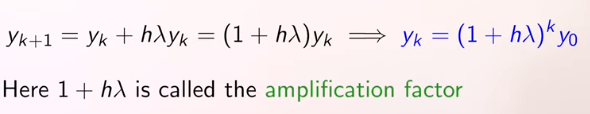

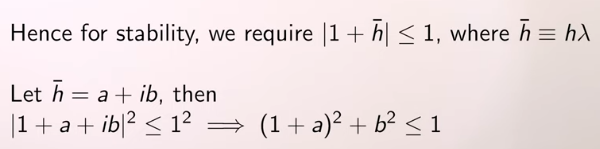

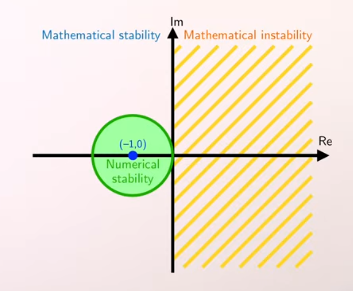

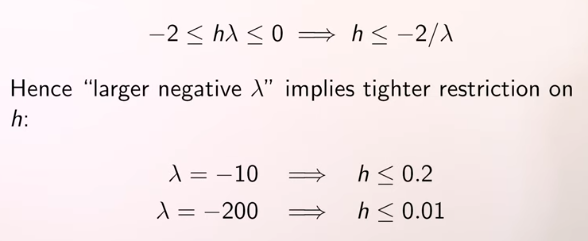

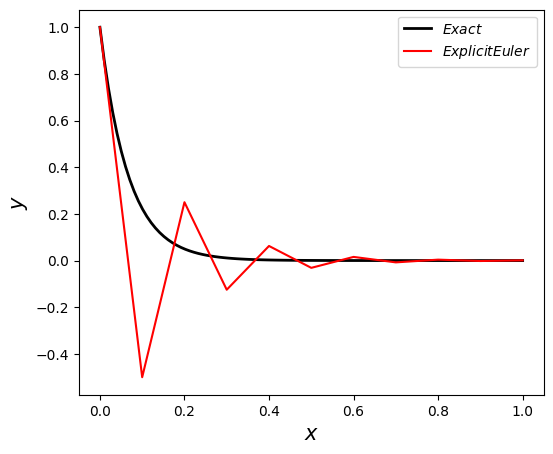

In [ ]:
#Last update:Piyush   8 Aug 2022
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0,1,100)

lam =  -15    #lambda
h   =  0.1    #step size

a   =  0      # left  endpoint of grid
b   =  1      # right endpoint of grid
y_0 =  1      # intitial Boundary condition y(0)=1

def euler_explicit(f_prime, y_0, a, b, h): #defining the euler method
    N=int((b-a)/h)                         #Number of steps
    x = a ; y = y_0                        #Initial Values to the equation y(0) and x(0)
    x_out,y_out =[a],[y_0]
    for i in range(N):
        y = y + h*f_prime(x, y)            #y_n+1 = y_n + h * f
        x = x + h
        x_out.append(x)
        y_out.append(y)
    return x_out, y_out
def solution(x):
  return np.exp(lam*x)
def f_prime(x, y):
  return lam*y
x_euler, y_euler = euler_explicit(f_prime, y_0, a, b, h)  #call the function and store the values in x and y
#plt.xlim([0,2])#plt.ylim([0.7,1.1])
plt.figure(figsize=(6,5))
plt.plot(x,solution(x),linewidth=2.0,color='black',label=r'$Exact$')
plt.plot(x_euler,y_euler,linewidth=1.5,color='red',label=r'$Explicit Euler$')
plt.xlabel(r'$x$',fontsize=15);plt.ylabel(r'$y$',fontsize=15)
plt.legend(loc='upper right')

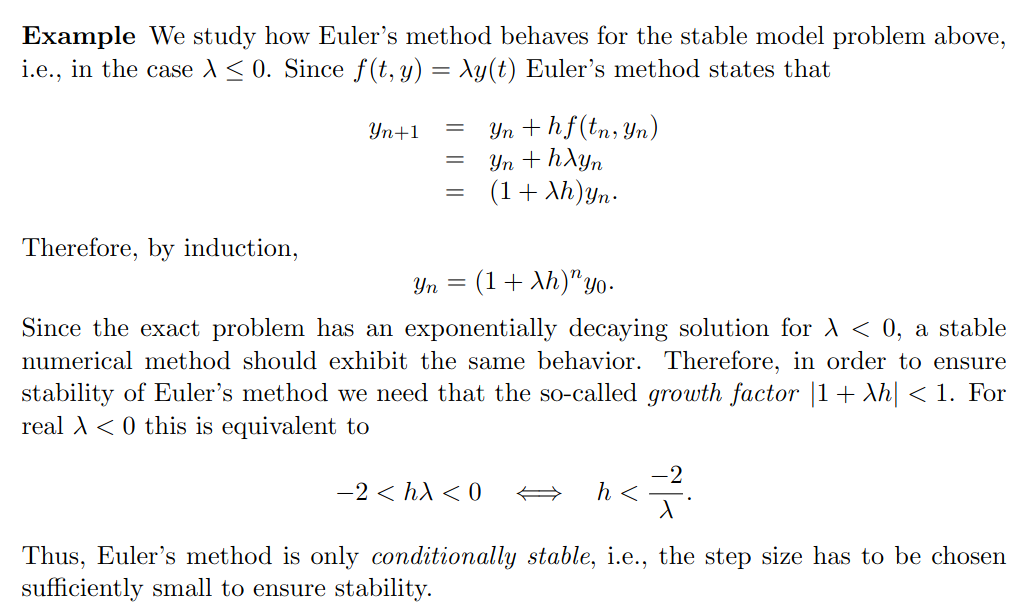

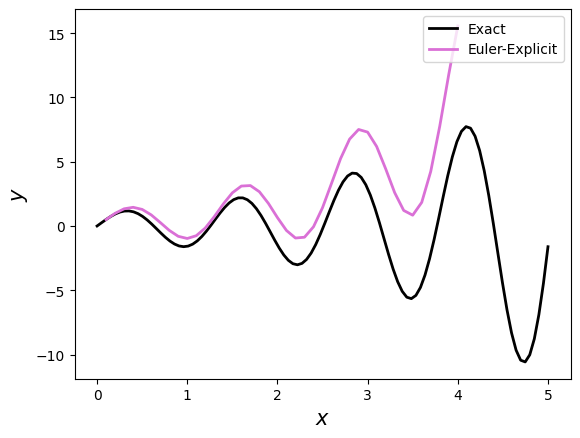

In [ ]:
x = np.linspace(0,5,100)
def euler_explicit(f_prime, y_0, a, b, h): #defining the euler method
    N=int((b-a)/h)                         #Number of steps
    x = a ; y = y_0                        #Initial Values to the equation y(0) and x(0)
    x_out,y_out =[a],[y_0]
    for i in range(N):
        y = y + h*f_prime(x, y)            #y_n+1 = y_n + h * f
        x = x + h
        x_out.append(x)
        y_out.append(y)
    return x_out, y_out

def solution(x):
  return np.exp(x/2)*np.sin(5*x)
def f_prime(x, y):
  return -0.5*np.exp(x/2)*np.sin(5*x)+5*np.exp(x/2)*np.cos(5*x)+y

x_euler, y_euler = euler_explicit(f_prime, 0, 0, 4, 0.1)  #call the function and store the values in x and y
#plt.figure(figsize=(6,6))
plt.plot(x,solution(x),linewidth=2.0,color='black',label='Exact')
plt.plot(x_euler,y_euler,linewidth=2.0,color='orchid',label='Euler-Explicit')
plt.xlabel(r'$x$',fontsize=15);plt.ylabel(r'$y$',fontsize=15)
plt.legend(loc='upper right')

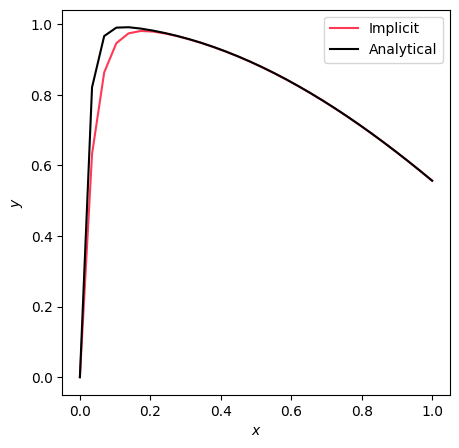

In [ ]:
#Euler Explicit and Euler Implicit
#Last update Piyush 10 Aug 2022
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 30)   #gridpoints

#Explicit Euler
def euler_explicit(x):
        y = np.zeros_like(x)  #empty array
        h = x[1] - x[0]       #step size
        for i in range(1, len(x)):
            y[i] = y[i-1] -50*h*(y[i-1] - np.cos(x[i]))
        return y
#Implicit Euler
def euler_implicit(x):
        y = np.zeros_like(x)    #empty array
        h = x[1] - x[0]         #step size
        for i in range(1, len(x)):
            y[i] = (y[i-1] + 50*h*np.cos(x[i])) / (50*h + 1)
        return y
def solution(x):
        return (50/2501)*(np.sin(x) + 50*np.cos(x)) - (2500/2501)*np.exp(-50*x)

plt.figure(figsize=(5,5))
plt.plot(x,euler_implicit(x),linewidth=1.5,color='#FF3855',label='Implicit')
#plt.plot(x,euler_explicit(x),linewidth=2.0,color='#4666FF',label='Explicit')
plt.plot(x,solution(x),linewidth=1.5,color='#000000',label='Analytical')
plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
plt.legend(loc='upper right')

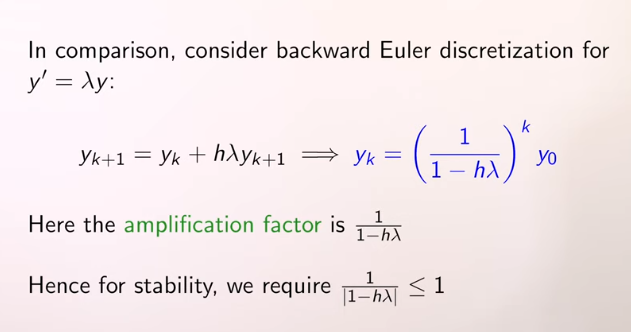

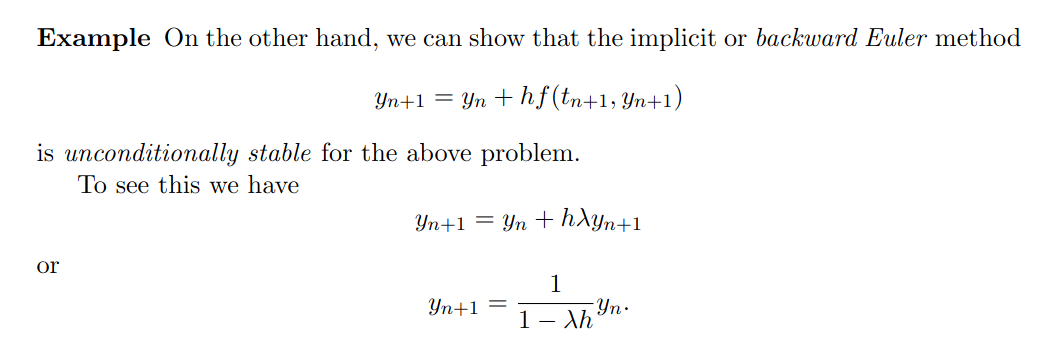

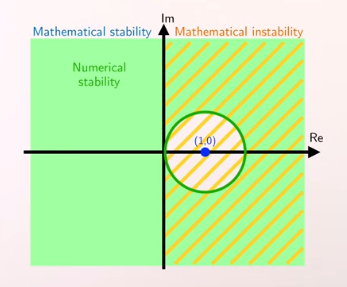

In [ ]:
#Error calculator
#Last update Piyush 17 Aug 2022
plt.figure(figsize=(7,6))
plt.plot(x,np.abs(solution(x)-euler_explicit(x)),color='orange',label='Explicit')
plt.plot(x,np.abs(solution(x)-euler_implicit(x)),color='deeppink',label='Implicit')
plt.xlabel(r'$x$')
plt.ylabel(r'$Error$')
plt.legend(loc='upper right')

**RK-4 method**

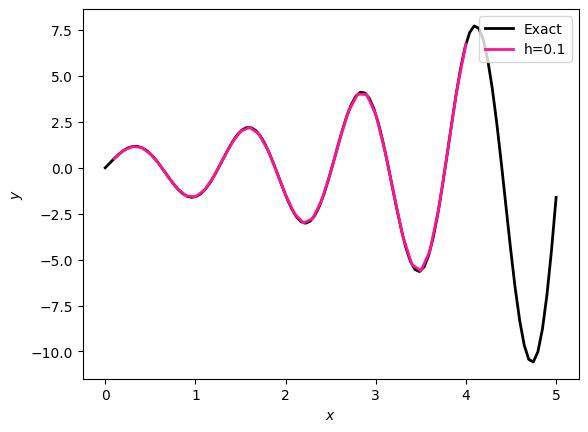

In [ ]:
#Last Update:Piyush
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 100)
def RK4(f_prime, y_0, a, b, h):
    N=int((b-a)/h)  #Number of steps
    x = a ; y = y_0
    x_out,y_out =[],[]
    for i in range(N):
        k1 = h*f_prime(x,y)
        k2 = h*f_prime(x+0.5*h,y+0.5*k1)
        k3 = h*f_prime(x+0.5*h,y+0.5*k2)
        k4 = h*f_prime(x+h,y+k3)

        y = y+ (1/6)*(k1+2*k2+2*k3+k4)   #RK-4
        x = x + h
        x_out.append(x)
        y_out.append(y)
    return x_out, y_out
def solution(x):
  return np.exp(x/2)*np.sin(5*x)
def f_prime(x, y):
  return -0.5*np.exp(x/2)*np.sin(5*x)+5*np.exp(x/2)*np.cos(5*x)+y
x_RK, y_RK = RK4(f_prime, 0, 0, 4, 0.1)
#x_RK1, y_RK1 = RK4(f_prime, 0, 0, 4, 0.1)

plt.xlabel(r'$x$');plt.ylabel(r'$y$')
#plt.ylim([-1.5,1.5])
plt.plot(x,solution(x),color='black',linewidth=2.0,label='Exact')
plt.plot(x_RK,y_RK,color='deeppink',linewidth=2.0,label='h=0.1')
#plt.plot(x_RK1,y_RK1,color='orange',linewidth=2.0,label='h=0.01')
plt.legend(loc='upper right')

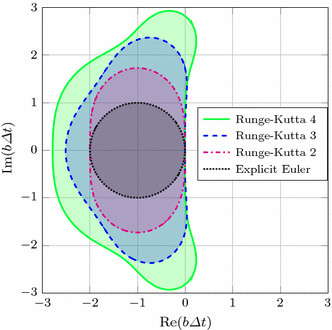

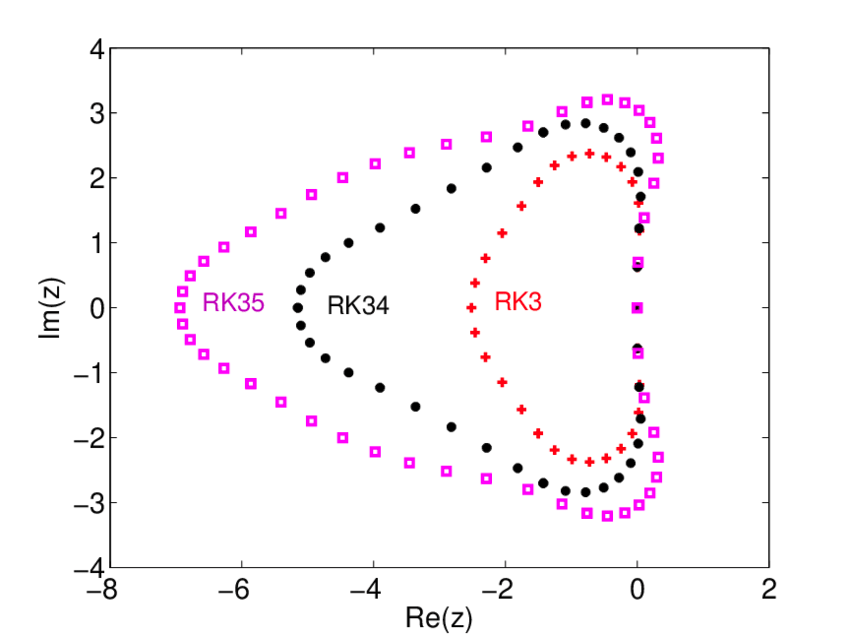

#**Solving the beast:**
$$\frac{dy}{dx}=-50(y-cos(x)) $$

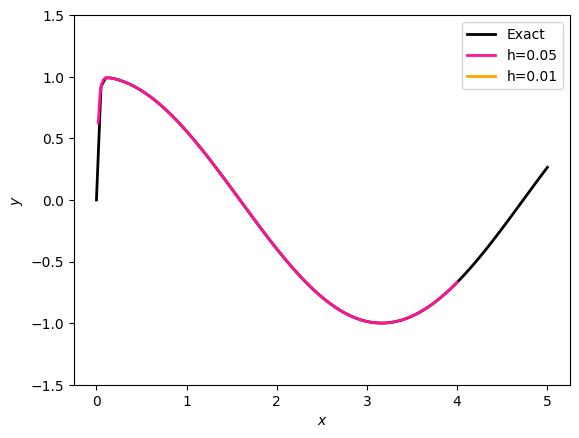

In [ ]:
#Last Update:Piyush 9 Aug 2022
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 100)

def RK4(f_prime, y_0, a, b, h):
    N=int((b-a)/h)  #Number of steps
    x = a ; y = y_0
    x_out,y_out =[],[]
    for i in range(N):
        k1 = h*f_prime(x,y)
        k2 = h*f_prime(x+0.5*h,y+0.5*k1)
        k3 = h*f_prime(x+0.5*h,y+0.5*k2)
        k4 = h*f_prime(x+h,y+k3)

        y = y+ (1/6)*(k1+2*k2+2*k3+k4)   #RK-4
        x = x + h
        x_out.append(x); y_out.append(y)
    return x_out, y_out

def f_prime(x, y):  #Differential equation
  return 50*(np.cos(x)-y)
def solution(x):    #Analytical solution
  return (50/2501)*(np.sin(x)+50*np.cos(x)-50*np.exp(-50*x))  #y(0)=0

x_RK, y_RK = RK4(f_prime, 0, 0, 4, 0.02)
x_RK1, y_RK1 = RK4(f_prime, 0, 0, 4, 0.5)

plt.xlabel(r'$x$');plt.ylabel(r'$y$')
plt.ylim([-1.5,1.5])
plt.plot(x,solution(x),color='black',linewidth=2.0,label='Exact')
plt.plot(x_RK,y_RK,color='deeppink' ,linewidth=2.0,label='h=0.05')
plt.plot(x_RK1,y_RK1,color='orange' ,linewidth=2.0,label='h=0.01')
plt.legend(loc='upper right')

##Partial Differential Equations

#**Differential Equations : Day 2**

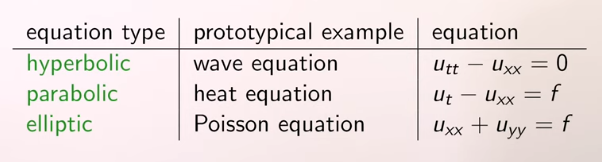

[[100.          0.          0.          0.          0.       ]
 [100.         25.          6.25        1.5625      0.       ]
 [100.         31.25        9.375       2.734375    0.       ]
 [100.         40.3125     19.921875   13.1640625   0.       ]
 [100.         30.         30.         30.          0.       ]]
[0.]


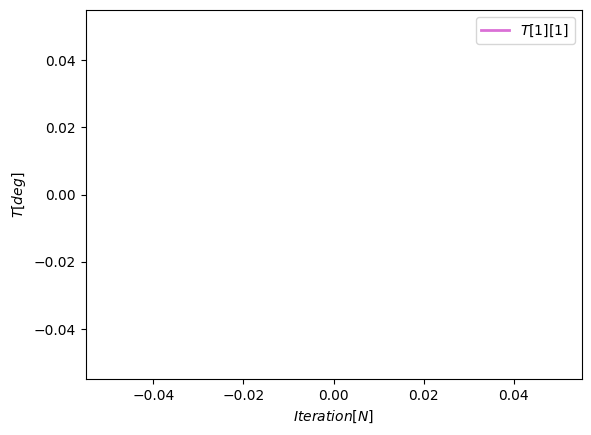

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 1              #max iter  #Set Dimension and delta
lenX = lenY = 5
delta = 1
#Boundary condition
Ttop      = 30; Tbottom   = 0; Tleft     = 100; Tright    = 0  #Trandom   = 100
Tguess = 0   #Intial guess for internal grid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))
T = np.empty((lenX, lenY))
T.fill(Tguess)

for m in range(0,lenX):
 T[(lenY-1):, :]   = Ttop
 T[:1, :]          = Tbottom
 T[:, (lenX-1):]   = Tright
 T[:, :1]          = Tleft
Tcen,Tcen1=[],[]
for k in range(0,N):
    Tcen.append(T[1][1])
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])
print(T)

x1 = np.linspace(0,N,N)
print(x1)
plt.xlabel('$Iteration [N]$');plt.ylabel(r'$T[deg]$')
plt.plot(x1,Tcen,linewidth=2.0,color='orchid',label=r'$T[1][1]$')
plt.legend()


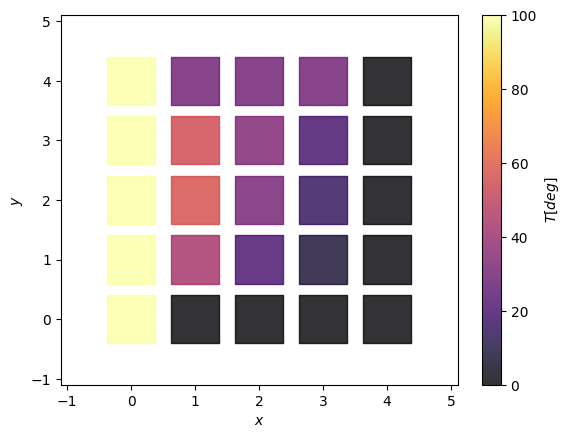

In [ ]:
plt.ylim([-1.1,5.1])
plt.xlim([-1.1,5.1])
plt.scatter(X,Y,c=T,marker='s',s=1200.0,alpha=0.8,cmap=plt.cm.inferno)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar(label=r'$T[deg]$')

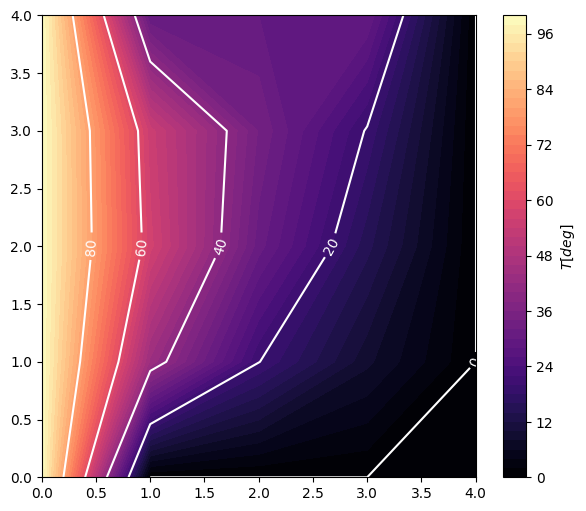

In [ ]:
plt.figure(figsize=(7,6))
contours = plt.contour(X, Y, T, 5,colors='white') # 5 contours
plt.clabel(contours, inline=True, fontsize=10.0)
plt.contourf(X, Y, T, 60, cmap=plt.cm.magma)
plt.colorbar(label=r'$T [deg]$')

##**Integration Algorithms  Day 1**

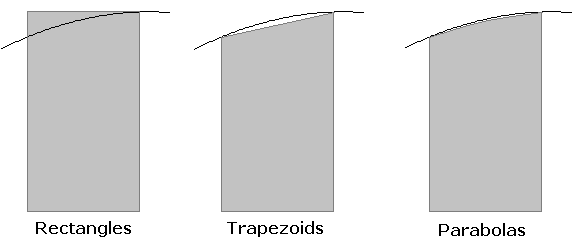

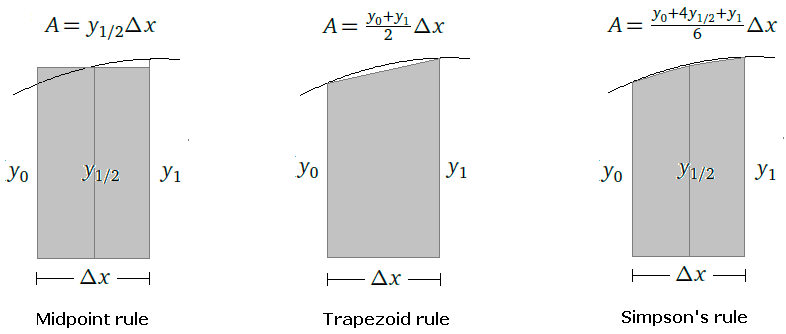

#$$f(x) = 1 + \frac{x}{4} \sin(\pi x)$$ $$I = 1 - \frac{1}{2\pi^2} \approx 0.949$$

In [32]:
# define the function
def f(x):
    return 1 + 0.25 * x * np.sin(np.pi * x)
a = 0.5
b = 1.5
# compute the 3 different approximations
I_r = f(a) * (b - a)                                         #Rectangular
I_t = 0.5 * (f(a) + f(b)) * (b - a)                          #Trapezoid
I_s = (b - a) / 6.0 * (f(a) + 4 * f((a + b)/2) + f(b))       #Simpson

I_a = 1 - 1/(2 * np.pi**2)
print(I_r, I_t, I_s, I_a)

1.125 0.875 0.9583333333333333 0.9493394081788311


##***Trapezoid Rule***

#$$\int_a^b f(x) dx \approx \frac{h}{2} \left(f(x_0) + 2 \left(\sum_{i=1}^{n-1} f(x_i)\right) + f(x_n)\right)
 $$

##Approximate the area under  $y = {2^x}$  from $x=[-1,3]$ using $n=5$ points

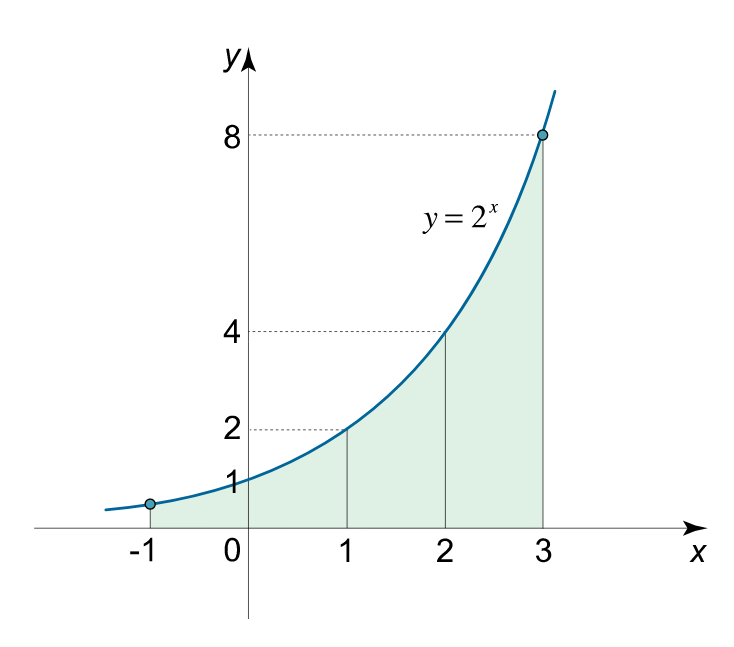

#${I_{trap}} = \frac{{\Delta x}}{2}\left[ {f\left( {{x_0}} \right) + 2f\left( {{x_1}} \right) + 2f\left( {{x_2}} \right) + 2f\left( {{x_3}} \right) + f\left( {{x_4}} \right)} \right].$

In [87]:
import numpy as np
a = -1
b =  3
n =  5              #
#h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
print(x)
h = x[1]-x[0]
f = 2**(x)               #define function here

I_trap = (1/2)*(f[0] + 2*sum(f[1:n-1]) + f[n-1]) #Trapezoidal rule
print(I_trap)

[-1.  0.  1.  2.  3.]
11.25


##$A \approx {I_{Trap}} = \frac{1}{2}\left[ {\frac{1}{2} + 2 \cdot 1 + 2 \cdot 2 + 2 \cdot 4 + 8} \right] = \frac{1}{2} \cdot 22\frac{1}{2} = 11\frac{1}{4} \approx 11.25$

##***Simpson's Rule***

#$$\int_a^b f(x) dx \approx \frac{h}{3} \left[f(x_0)+4 \left(\sum_{i=1, i\  {\text{odd}}}^{n-1}f(x_i)\right)+2 \left(\sum_{i=2, i\  {\text{even}}}^{n-2}f(x_i)\right)+f(x_n)\right]$$


##Approximate the area under  $y = {3^x}$  from $x=[-2,2]$ using $n=5$ points

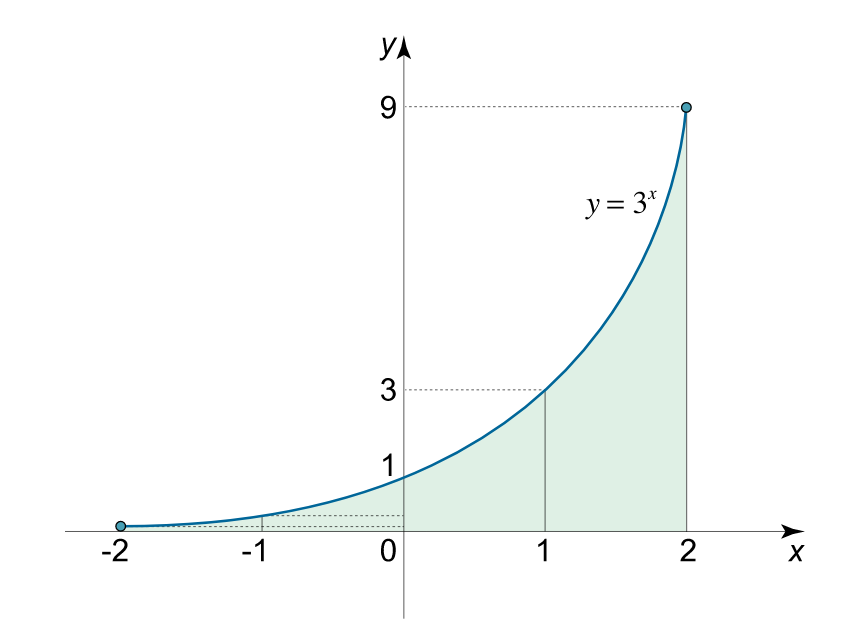

#${I_{simp}} = \frac{{\Delta x}}{3}\left[ {f\left( {{x_0}} \right) + 4f\left( {{x_1}} \right) + 2f\left( {{x_2}} \right) + 4f\left( {{x_3}} \right) + f\left( {{x_4}} \right)} \right]$

In [100]:
import numpy as np
a = -2
b =  2
n =  5
#h = (b - a)/(n - 1)
x = np.linspace(a, b, n)
h = x[1]-x[0]
f = 3**x
I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) + 4*sum(f[1:n-1:2]) + f[n-1])
print(I_simp)

8.222222222222221


##**Gauss Quadrature**

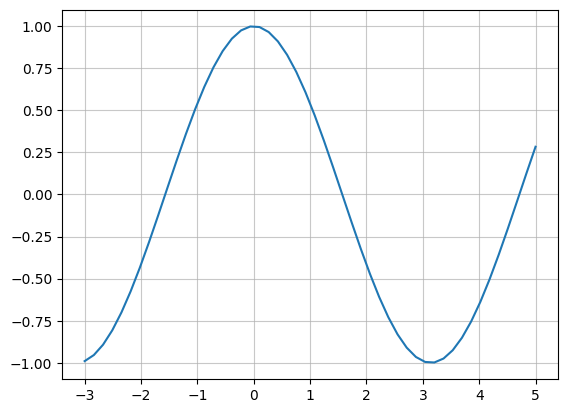

In [114]:
import matplotlib.pyplot as plt
import numpy as np
x_grid=np.linspace(-3,5,50)
plt.plot(x_grid,np.cos(x_grid))
plt.grid(alpha=0.69)

#$\int_{-1}^{1}\cos x dx=\sin (1) - sin(-1) =1.68294$

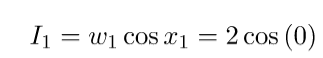

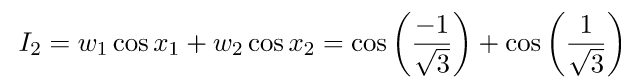

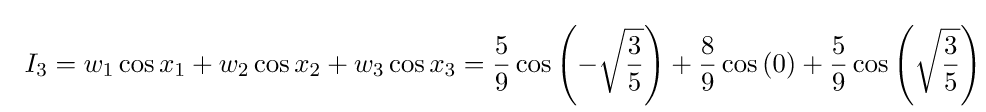

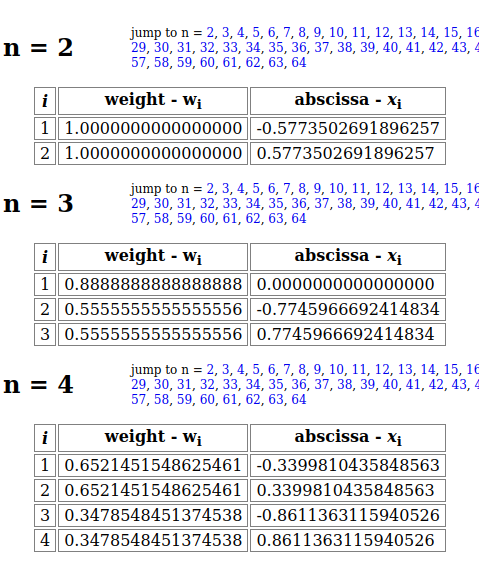

In [47]:
#gauss quadrature
def f(x):
  return np.cos(x)
a = -1
b =  1
# compute the 3 different Gauss quadrature points
I_g1 = 2*f(0)
I_g2 = 1*f(-0.577)+1*f(0.577)
I_g3 = 0.888*f(0)+0.555*f(-0.774596)+0.555*f(0.774596)
I_g4 = 0.347855*f(-0.861136)+0.652245*f(-0.339981)+0.652245*f(0.339981)+0.347855*f(0.861136)
print(I_g1,I_g2,I_g3,I_g4)

2.0 1.6762059103607088 1.6813210637546339 1.683130334110803


*Equating the upper bound for the error in the midpoint rule to the error produced by a Gauss integration scheme yields*

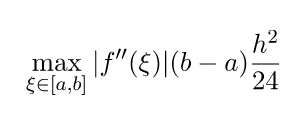

In [50]:
#Error in 4 point Gauss quadrature
1.68313033411-1.68294

0.00019033410999980127

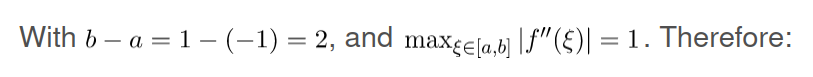

#$h=\sqrt{\frac{0.00019 \times 24}{2}}=0.047749$

In [51]:
#Number of rectangles required
step=np.sqrt((0.00019*24)/2)
print(2/step)

0.047749345545253286
41.88539082916955


*Let's use the Trapezoid method with the number of "rectangles" required*

In [49]:
import numpy as np
a = -1
b =  1
n = 42
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.cos(x)               #define function here

I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - I_trap

print(I_trap)
print(err_trap)

1.6826082379645773
0.31739176203542274


*We obtain the accuracy of the 4-point Gauss quadrature this demonstrates the computational efficiency of this scheme with respect to Trapezoid method which requires $\sim 40$ function evaluations whereas Gauss Quad only used $4$.*

In [19]:
#Gauss Legendre Quadrature
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    #return 1/(2+x**2)
    return x**2
a = 0
b = 1
x_1 = [0]                                       ; w_1 = [2]
x_2 = [-0.577,0.577]                            ; w_2 = [1.000,1.000]
x_3 = [0.000,-0.744,0.744]                      ; w_3 = [0.888,0.555,0.555]
x_4 = [-0.339,0.339,-0.861,0.861]               ; w_4 = [0.652,0.652,0.347,0.347]
x_5=  [-0.90618,-0.538469,0,0.538469,0.909618]  ; w_5 = [0.236927,0.478629,0.56889,0.478629,0.236927]
integral=0
N=4
if N == 1:
    integral += w_1[0]*(b-a)*0.5*(f((0.5*((b-a)*x_1[0]+(b+a)))))
elif N == 2:
  for i in range(len(x_2)):
      integral += +w_2[i]*(b-a)*0.5*(f((0.5*((b-a)*x_2[i]+(b+a)))))
elif N == 3:
  for i in range(len(x_3)):
      integral += w_3[i]*(b-a)*0.5*(f((0.5*((b-a)*x_3[i]+(b+a)))))
elif N == 4:
    for i in range(len(x_4)):
      integral += w_4[i]*(b-a)*0.5*(f((0.5*((b-a)*x_4[i]+(b+a)))))
else :
    for i in range(len(x_5)):
      integral += w_5[i]*(b-a)*0.5*(f((0.5*((b-a)*x_5[i]+(b+a)))))
print(integral)

0.33279171975


##**Monte Carlo**

#$\int_{a}^{b} f(x)dx=\frac{N_{inside}}{N_{points}}\times(b-a)(d-c)$

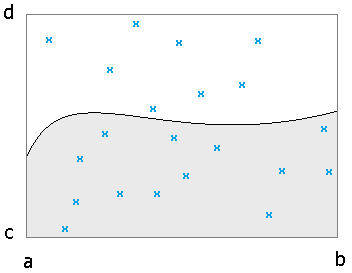

##$\int_{0}^{3}\frac{1}{2+x^2} \approx 0.7992326$

Integral= 0.78


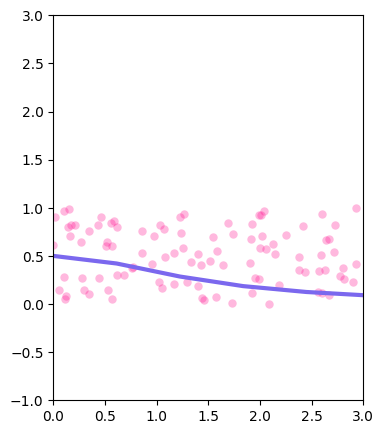

In [171]:
#19 Nov 2022
from random import uniform
import numpy as np
import matplotlib.pyplot as plt
x_ran,y_ran=[],[]
def funci(x):
  return 1/(2+x**2)
def monte_carlo_integrate(f, a, b, c, d, num_points):
    inside_count = 0
    for i in range(num_points):
        x = uniform(a,b)
        y = uniform(c,d)
        x_ran.append(x);y_ran.append(y)
        if  0 <= y <= f(x):
          inside_count += 1
        elif f(x) <= y <= 0:
          inside_count -= 1
        #print(inside_count)
    return inside_count/num_points*(b-a)*(d-c)
print("Integral=",monte_carlo_integrate(funci,0,3,0,1,100))
x1=np.linspace(0,30)
plt.figure(figsize=(4,5));plt.xlim([0,3]); plt.ylim([-1,3])
plt.plot(x1,funci(x1),color='mediumslateblue',linewidth=3.0)
plt.scatter(x_ran,y_ran,linewidth=0.007,c ="deeppink",alpha=0.3)

Integral= 0.7638000000000003


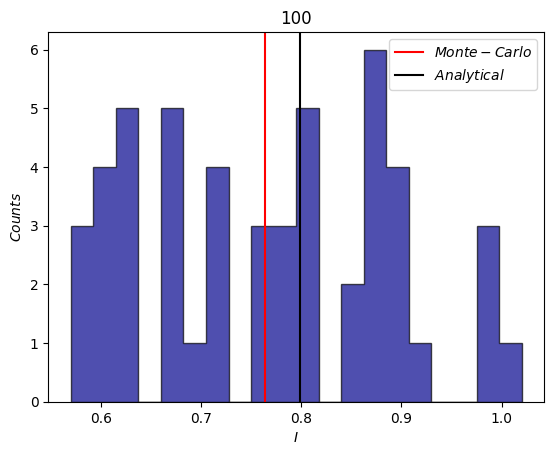

In [160]:
monty=[]
N  = 50   #number of times
N1 = 100 #number of points
def funci(x):
  return 1/(2+x**2)
for k in range(0,N):
  monty.append(monte_carlo_integrate(funci,0,3,0,1,N1))
sum=0
for i in range(0, len(monty)):
   sum = sum + monty[i];
average=sum/len(monty)
print("Integral=",average)
plt.hist(monty,histtype='stepfilled',color='darkblue',alpha=0.69,edgecolor='black', bins=20)
plt.title(N1)
plt.ylabel(r'$Counts$')
plt.xlabel(r'$I$')
plt.axvline(average,color='red',label=r'$Monte-Carlo$')
plt.axvline(0.7992367,color='black',label=r'$Analytical$')
plt.legend()